In [1]:
from glob import glob

dir_list = glob('../isochrones/*')
dir_list

['../isochrones/NIR',
 '../isochrones/isochrones_comparison.pdf',
 '../isochrones/NIR_optical']

In [6]:
dir_list.pop(1)

'../isochrones/isochrones_comparison.pdf'

In [8]:
import isochrones

assert isochrones.__version__=='2.1'

In [9]:
import pandas as pd

dfs = {}
for dir in dir_list:
    df = pd.read_hdf(dir+'/mist_starmodel_single.h5', key='derived_samples')
    name = dir.split('/')[-1]
    dfs[name] = df

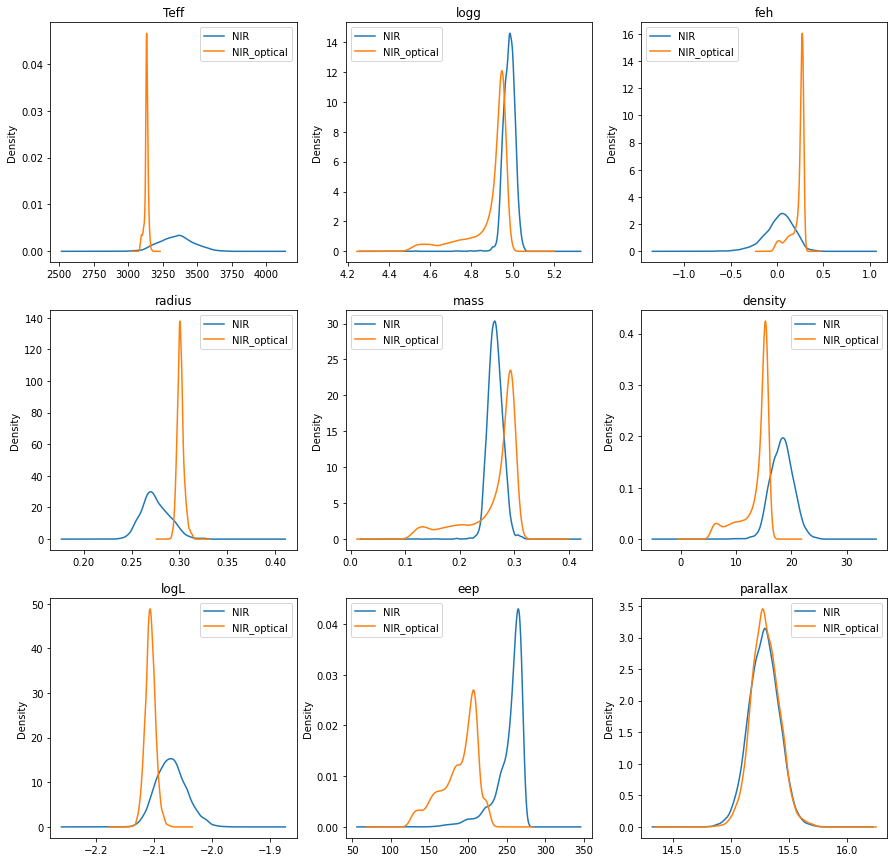

In [10]:
import matplotlib.pyplot as pl

params = 'Teff logg feh radius mass density logL eep parallax'.split()

fig, axs = pl.subplots(3, 3, figsize=(15,15))
ax = axs.flatten()

for n,param in enumerate(params):
    for key in dfs.keys():
        _ = dfs[key][param].plot.kde(ax=ax[n], label=key)
        ax[n].set_title(param)
        ax[n].legend()

In [ ]:
fig.savefig('../isochrones/isochrones_comparison.pdf', bbox_inches='tight')